# Bike Rental Prediction

In [17]:
#First, let's import the nesseacary labraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [18]:
df=pd.read_csv("Bike Rental UCI dataset.csv")
print ('the data frame has a shape :', df.shape)
print ('let\'s print the first five rows \n', df.head())

the data frame has a shape : (17379, 13)
let's print the first five rows 
    season  yr  mnth  hr  holiday  workingday  weathersit  temp   hum  \
0       1   0     1   0        0           0           1  0.24  0.81   
1       1   0     1   1        0           0           1  0.22  0.80   
2       1   0     1   2        0           0           1  0.22  0.80   
3       1   0     1   3        0           0           1  0.24  0.75   
4       1   0     1   4        0           0           1  0.24  0.75   

   windspeed dayOfWeek  days  demand  
0        0.0       Sat     0      16  
1        0.0       Sat     0      40  
2        0.0       Sat     0      32  
3        0.0       Sat     0      13  
4        0.0       Sat     0       1  


In [19]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   hum         17379 non-null  float64
 9   windspeed   17379 non-null  float64
 10  dayOfWeek   17379 non-null  object 
 11  days        17379 non-null  int64  
 12  demand      17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB
None
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775    

### Comment : In this part, we just configure our dataframe by reading the csv file, with this we print information that we took from it just to make sure it gets the informations we need.

Looks like the dataframe has 17379 rows and 13 columns. There is one columns of type object (text) <br>
temp, hum, windspeed are rescaled to 0-1 range

## 2. Visualize the data

'Done'

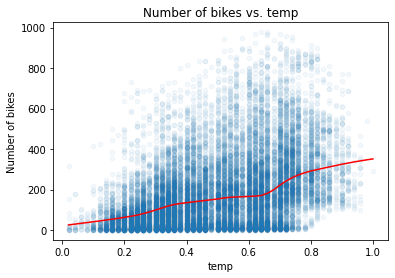

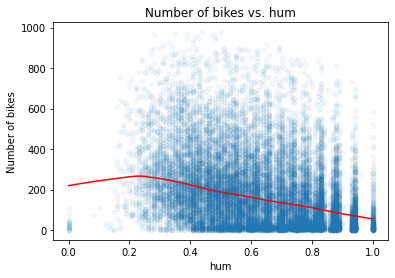

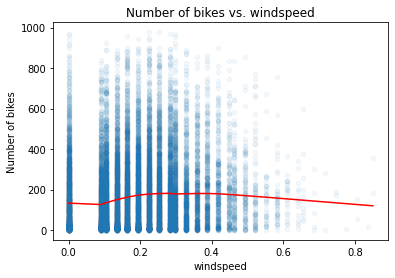

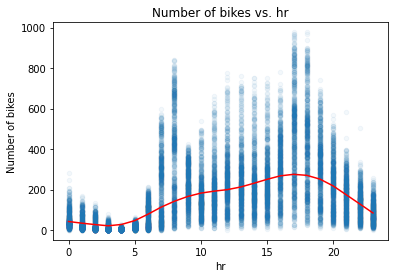

In [20]:

# make sure that the visualizations are printed in the notebook
%matplotlib inline   

def bike_scatter(df, cols):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    
    ## Loop over the columns and create the scatter plots
    for col in cols:
        ## first compute a lowess fit to the data
        los = lw.lowess(df['demand'], df[col], frac = 0.3)
    
        ## Now make the plots
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df.plot(kind = 'scatter', x = col, y = 'demand', ax = ax, alpha = 0.05)
        plt.plot(los[:, 0], los[:, 1], axes = ax, color = 'red')
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'

num_cols = ["temp", "hum", "windspeed", "hr"] 
bike_scatter(df, num_cols)

### Comment : 
#### - Number of bikes vs temp : we see on this one, as the temperature increases, the number of bikes rent increases with it.
#### - Number of bikes vs hum : Totally the opposite as the graphics with the temperature, when moisture is high, bike are less rented than the other way round
#### - Number of bikes vs windspeed : As we see from this graph, windspeed is not a factor that impacts the rent of the bikes, it’s stagnating. 
#### - Number of bikes vs hr : From this graph, we can think that peoples rents bikes more likely in the middle of the day than at the beginning of the morning or the end of the afternoon. 

'Done'

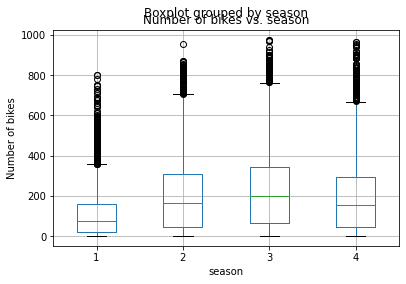

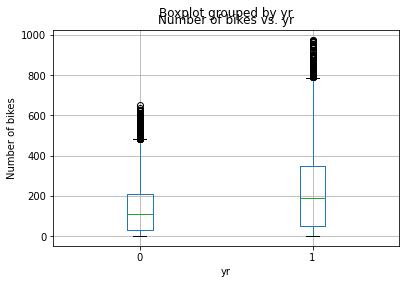

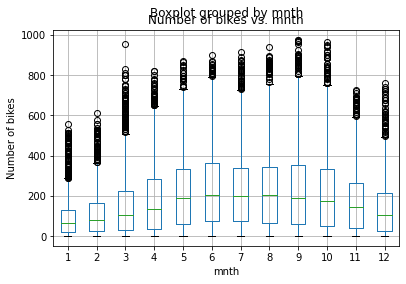

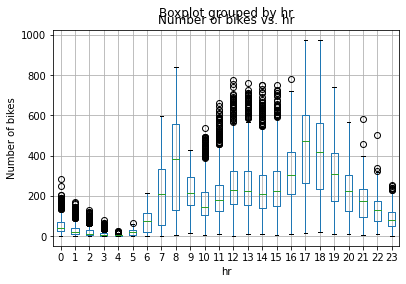

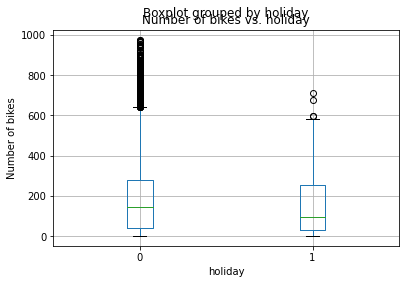

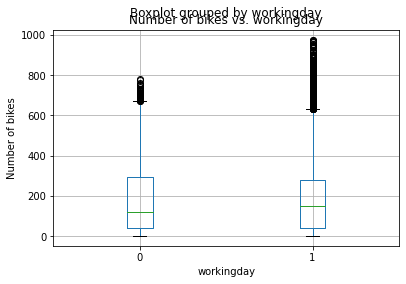

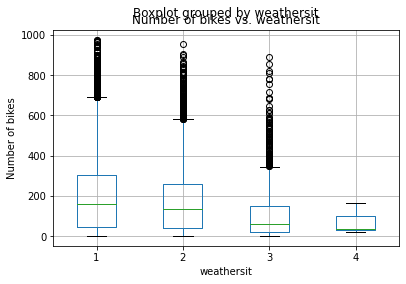

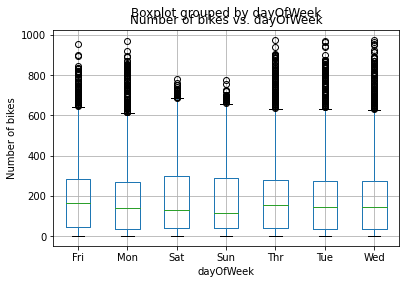

In [21]:
def bike_box(df, cols):
    import matplotlib.pyplot as plt
    
    ## Loop over the columns and create the box plots
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column = 'demand', by = col, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday','workingday', 'weathersit', 'dayOfWeek']
bike_box(df, cat_cols)

### Comment : 
#### Boxplot grouped by season : we can see in that graph that demand in season 1 is less important than the other seasons where it's quite equal, despite season 3 which has more demand than the others seasons
#### Boxplot grouped by yr : there is more demand in year 1 than year 0, that's all we can say
#### Boxplot grouped by mnth : sunny seasons are most likely to rent more bikes than the other season, as we see in this graph where between May and October, we got the peek of bikes rented
#### Boxplot grouped by hr : this graph confirms what we said before with the last script, people are more renting bikes in the middle of the day.
#### Boxplot grouped by holiday : We can see than the rendering is quite the same, but we can see that there is much more demand when it's not holiday than the other way, and that is logical.
#### Boxplot grouped by workingday : the same as the holiday.
#### Boxplot grouped by weathersit : As the number of the weathersit increases, the number of demand decreases consistently, we can think that these number are here to tell us what is the condition outside.
#### Boxplot grouped by dayOfWeek : People are more attract to rent bikes in the first five days of the week than the weekend.

'Done'

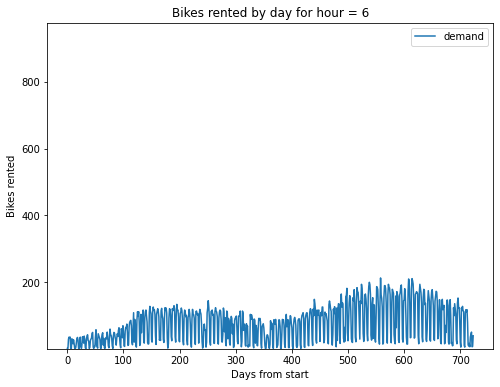

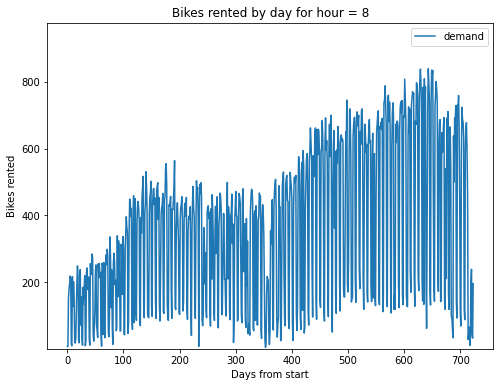

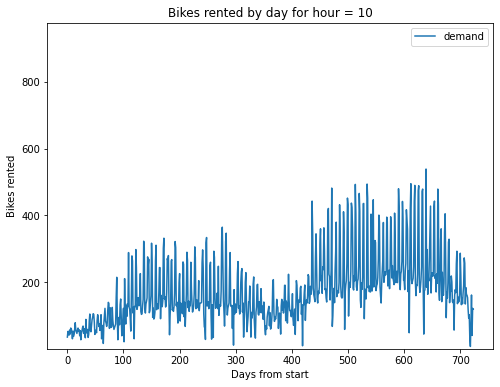

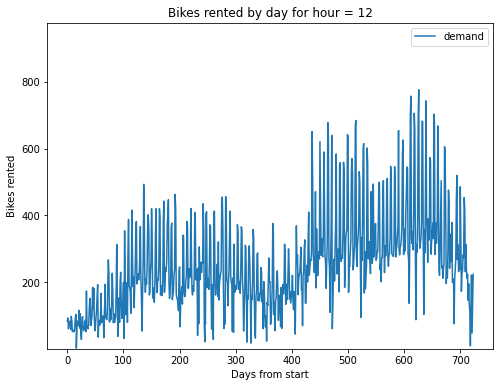

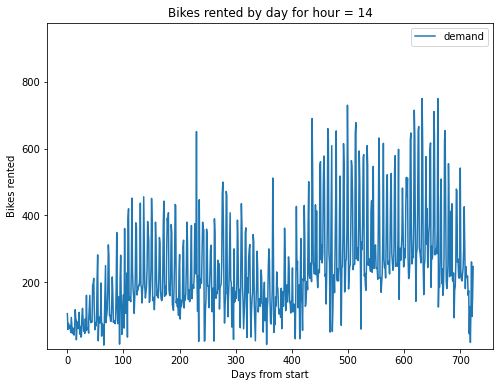

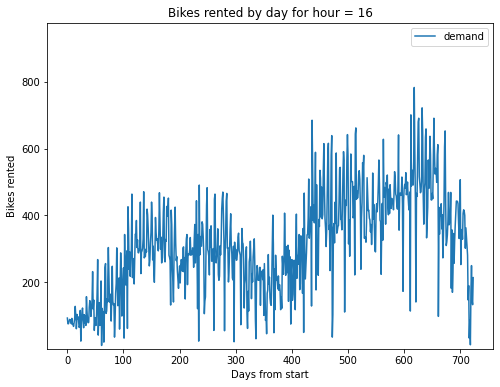

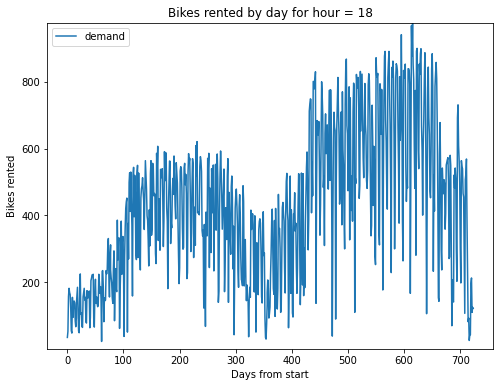

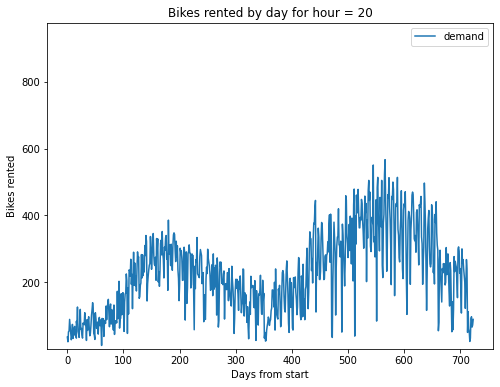

In [22]:
def bike_series(df, tms):
    import matplotlib.pyplot as plt
        
    lims = (min(df.demand), max(df.demand))   
    for t in tms:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == t].plot(kind = 'line', x = 'days', y = 'demand',
                            ylim = lims, ax = ax)    
        plt.xlabel("Days from start")
        plt.ylabel("Bikes rented")
        plt.title("Bikes rented by day for hour = " + str(t))
    return 'Done'
plt_times = [6, 8, 10, 12, 14, 16, 18, 20]
bike_series(df, plt_times)

### Comments : 
#### - Bikes rented by day for hour 6 : It seems in this graph, there is not a lot of the bikes rented even at the beginning and at the end but we have a quite a lot of demand
#### - Bikes rented by day for hour 8 : Throughout days, we can see that at 8 a clock, we have the most demand for the most bikes rented
#### - Bikes rented by day for hour 12, 14 and 18 : It seems in these graphs, there is less demand but still a high amount of bikes rented
#### - Bikes rented by day for hour 10 and 20 : We see in these hours, much less demand for less bikes rented, still better than the hour 6 but not good enough to compare to the others
#### - Bikes rented by day for hour 16 : We still got a lot of bikes rented but a low number of demand at this hour

'Done'

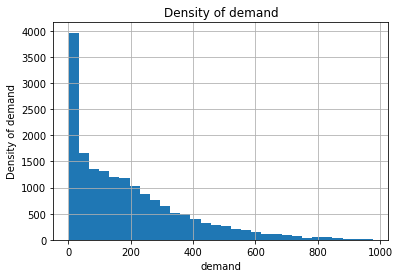

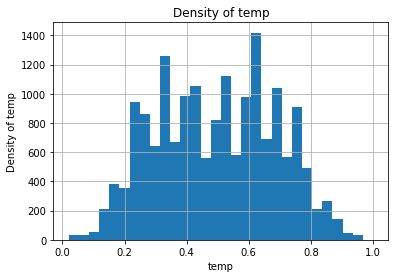

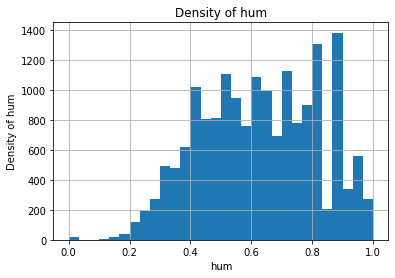

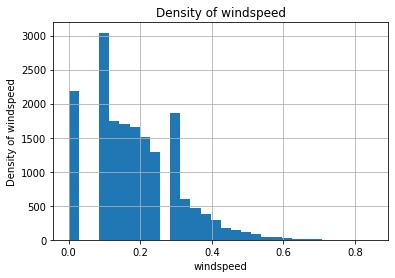

In [23]:
def bike_hist(df, cols):    
    import matplotlib.pyplot as plt
    
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    
    return 'Done'
hist_cols = ["demand", "temp", "hum", "windspeed"]
bike_hist(df, hist_cols)

#### Comment :
### Density of demand : That shows us that people demand a low number of bikes
### Density of temperature : There is a big density between 0,2 and 0,6+, which is the average
### Density of hum : We got here a high density of humidity where we go around 0,6
### Density of windspeed : In average, windspeed is low and this has not to be taken into account

## 3. Building the Model

In [24]:
# custom function to split a dataframe on the column "days"
def split_on_days(X, y, test_size = 0.3):    
    splitting_threshold = 0.7
    X_train = X.sample(frac=splitting_threshold,random_state=200)
    y_train = y.sample(frac=splitting_threshold,random_state=200)
    X_test = X.sample(frac = test_size)
    y_test = y.sample(frac = test_size)
    return X_train, X_test, y_train, y_test 

In [31]:
y = df['demand'].copy()
X = df.drop(['demand'], axis=1).copy()
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes # convert categorical into numerical

X_train, X_test, y_train, y_test = split_on_days(X, y, test_size=0.3)

print ("the max day in X_train is : {}".format(X_train['dayOfWeek'].max()))
print ("the min day in X_test is: %d" % (X_test['dayOfWeek'].min()))
print ("*"*50)
print('X_train length = %d,  y_train length = %d' %(len(X_train), len(y_train)))
print('X_test length = %d,  y_test length = %d' %(len(X_test), len(y_test)))

the max day in X_train is : 6
the min day in X_test is: 0
**************************************************
X_train length = 12165,  y_train length = 12165
X_test length = 5214,  y_test length = 5214


In [32]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = ', test_score)

train score = 0.3867105781655762
test score =  -0.3541493304555803


Looks like the model is not fitting well the data, since R2 is small. 
There might also be a sign of overfitting since there is a little difference between training and test r-square. Let's now print the model's parameters

In [27]:
reg.coef_

array([-1.47415419e-01,  3.64372604e+02,  3.03240192e+01,  6.69872276e-02,
       -5.78646467e-01,  3.46146212e-02, -4.19198850e-01, -2.76333217e-01,
        1.97609557e+00,  1.59730081e+00, -5.13392037e-02, -5.67954175e-04])

In [28]:
reg.intercept_

-20.781589105906164

Let's print some other metrics

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred)
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))

mse = 84200.70449638097, rmse = 290.1735764958294 
mae = [235.73172673] r2 = -0.9367263954188385


## 4. Visualize the model's performance

'Done'

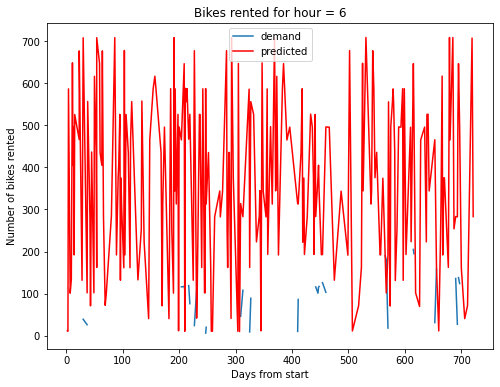

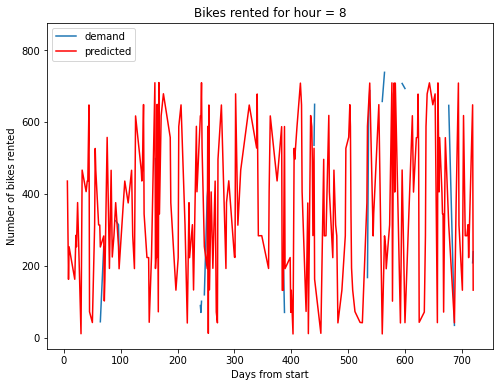

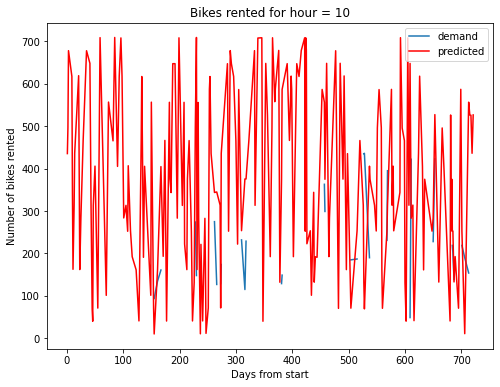

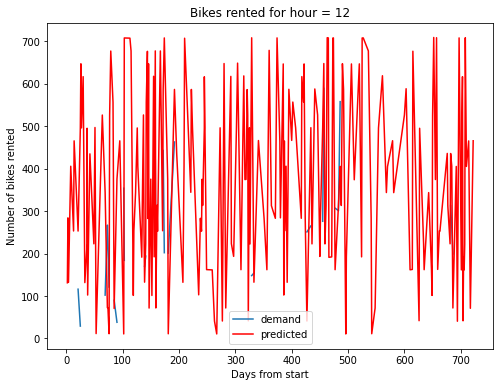

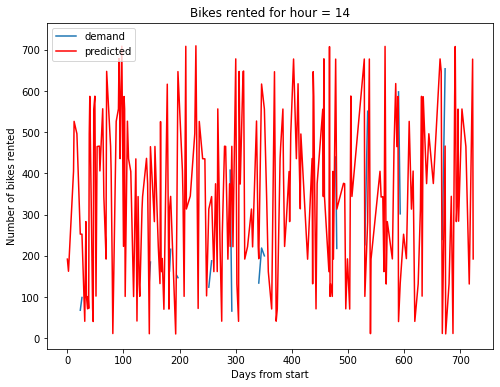

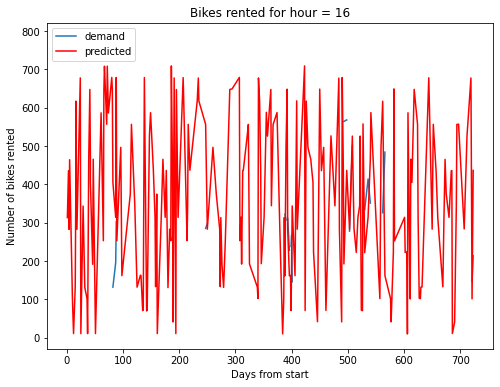

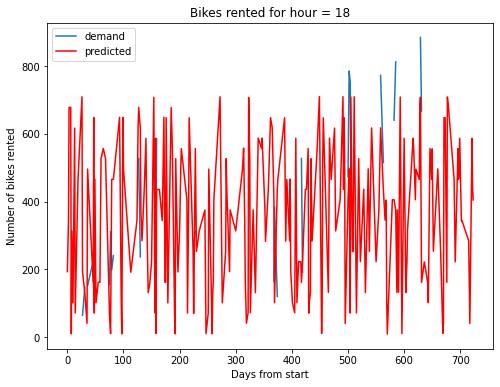

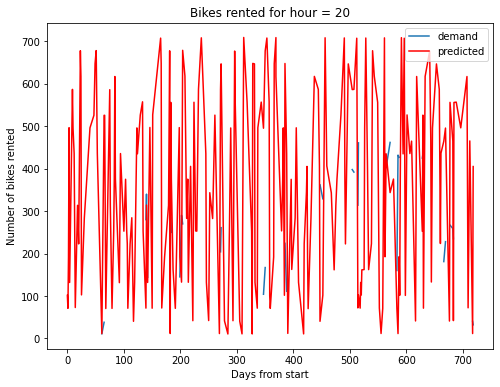

In [33]:
def ts_bikes(df, times):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    for tm in times:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'demand', ax = ax)          
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'predicted', color = 'red', ax = ax)                                    
        plt.xlabel("Days from start")
        plt.ylabel("Number of bikes rented")
        plt.title("Bikes rented for hour = " + str(tm))
        #fig.savefig('ts_' + str(tm) + '.png')
    return 'Done'

X_test['predicted']=y_pred
X_test['demand']=y_test
X_test.sort_values('days',inplace=True)
ts_bikes(X_test, plt_times)

Looks like the model is not doing a great job in fitting the demand for hours 8 and 18. Let's plot the reisuals for all hours

'Done'

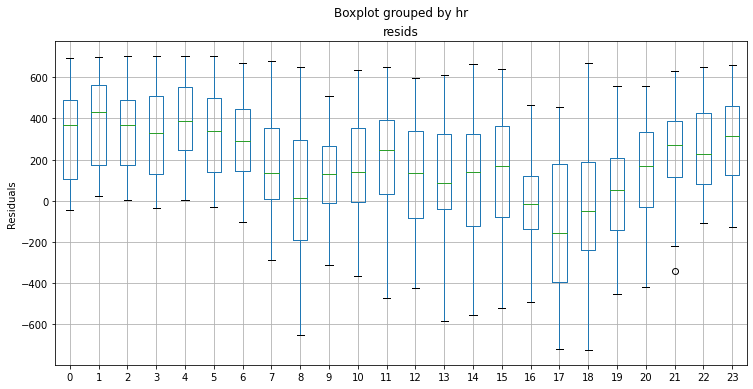

In [34]:
def resids(df):
    df['resids'] = df.predicted - df.demand
    return df        
        
def box_resids(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    
    df = resids(df)
    
    fig = plt.figure(figsize=(12, 6))
    fig.clf()
    ax = fig.gca()  
    df.boxplot(column = ['resids'], by = ['hr'], ax = ax)   
    plt.xlabel('')
    plt.ylabel('Residuals')
    fig.savefig('boxes' + '.png')
    return 'Done'
box_resids(X_test)

for hours 7,8, 17, 18 most of the residuals are negative, so our model is under-predecting the demand

Plot the histogram of residuals. A good model has residuals centered around zero

<AxesSubplot:>

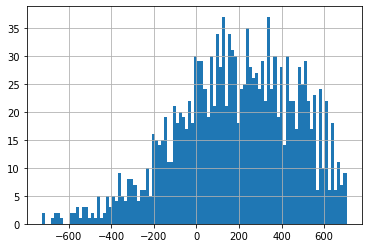

In [35]:
resids(X_test)['resids'].hist(bins=100)

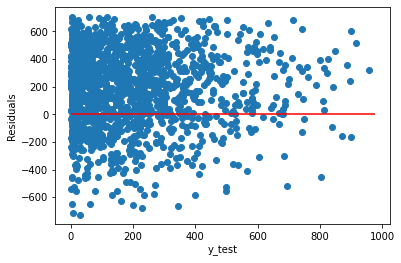

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_test, resids(X_test)['resids'])
plt.hlines(y=0, xmin=0,xmax=y_test.max(), color='r')
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.show()

As we've seen before, there might be a sign of overfitting, so regularization might help improving the model's performance on test set. Let's try Ridge and Lasso to confirm that

In [38]:
# Split the data again into X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = split_on_days(df,df['demand'])
# Import Ridge : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
from sklearn.linear_model import Ridge
# import Lasso : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
from sklearn.linear_model import Lasso
# try different values for alpha = [0.001, 0.01, 0.1, 1, 10, 100,1000,1000]
alpha = [0.001, 0.01, 0.1, 1, 10, 100,1000,1000]

for i in alpha:
  clf = Ridge(alpha=1.0)
  clf.fit(X, y)

  print  ('train score =', )

  model_lasso = Lasso(alpha=i)
  print  ('test score = ', )
  print  ('Coeffecients = ', clf.coef_)

train score =
test score = 
Coeffecients =  [ 2.00938598e+01  1.18717504e+02  3.13513378e+00  7.70729717e+00
 -2.56521241e+01  4.40378556e+00 -3.84880154e+00  2.82507597e+02
 -1.96325622e+02  2.98863905e+01 -6.11096858e-01 -1.03564544e-01]
train score =
test score = 
Coeffecients =  [ 2.00938598e+01  1.18717504e+02  3.13513378e+00  7.70729717e+00
 -2.56521241e+01  4.40378556e+00 -3.84880154e+00  2.82507597e+02
 -1.96325622e+02  2.98863905e+01 -6.11096858e-01 -1.03564544e-01]
train score =
test score = 
Coeffecients =  [ 2.00938598e+01  1.18717504e+02  3.13513378e+00  7.70729717e+00
 -2.56521241e+01  4.40378556e+00 -3.84880154e+00  2.82507597e+02
 -1.96325622e+02  2.98863905e+01 -6.11096858e-01 -1.03564544e-01]
train score =
test score = 
Coeffecients =  [ 2.00938598e+01  1.18717504e+02  3.13513378e+00  7.70729717e+00
 -2.56521241e+01  4.40378556e+00 -3.84880154e+00  2.82507597e+02
 -1.96325622e+02  2.98863905e+01 -6.11096858e-01 -1.03564544e-01]
train score =
test score = 
Coeffecients

You can see that regularization is not bringing improvment to the model. The performance is decreasing with large values of alpha. The main difference is that with Lasso, parameters are shrinked to zero

Another way of improving the model is by adding extra features (complexity). As we've seen before, the model has poor performance for some hours. Let's add Boolean features indicating the model each hour. These are also called dummy variables.

In [39]:
for hour in df.hr.unique():
    col='is_'+str(hour)
    df[col]= (df.hr == hour).astype("int")
print (df.columns)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'dayOfWeek', 'days', 'demand', 'is_0',
       'is_1', 'is_2', 'is_3', 'is_4', 'is_5', 'is_6', 'is_7', 'is_8', 'is_9',
       'is_10', 'is_11', 'is_12', 'is_13', 'is_14', 'is_15', 'is_16', 'is_17',
       'is_18', 'is_19', 'is_20', 'is_21', 'is_22', 'is_23'],
      dtype='object')


In [40]:
df[["hr"] + ["is_" + str(i) for i in range(24)]].head(24)

,hr,is_0,is_1,is_2,is_3,is_4,is_5,is_6,is_7,is_8,...,is_14,is_15,is_16,is_17,is_18,is_19,is_20,is_21,is_22,is_23
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Re-train your model

In [ ]:
y = #
X = #
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes




print  ('train score =', )
print  ('test score = ', )

In [ ]:
y_pred = reg.predict(X_test)  # predict the demand for X_test
X_test['predicted']=y_pred
X_test['demand']=y_test
ts_bikes(X_test, plt_times)

Visualize the residuals

In [ ]:
box_resids(X_test)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, resids(X_test)['resids'])
plt.hlines(y=0, xmin=0,xmax=y_test.max(), color='r')
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.show()